In [2]:
import gmsh
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use('/Users/msb/Documents/01_PHD/03_Methods/Meshing/spline_mesher/src/pyhexspline/cfgdir/pos_monitor.mplstyle')

In [3]:
meshpath = '/Users/msb/Documents/01_PHD/05_PUBLICATIONS-PRESENTATIONS/2024-SBMS/img/C0003099sweep_7.msh'

In [4]:
gmsh.initialize()
gmsh.merge(meshpath)
gmsh.model.occ.synchronize()
# gmsh.model.mesh.generate(3)

# get element qualities:
_, eleTags , _ = gmsh.model.mesh.getElements(dim=3)
q = gmsh.model.mesh.getElementQualities(eleTags[0], "minSICN")

# alternative using plugin:
gmsh.plugin.setNumber("AnalyseMeshQuality", "ICNMeasure", 1.)
gmsh.plugin.setNumber("AnalyseMeshQuality", "CreateView", 1.)
t = gmsh.plugin.run("AnalyseMeshQuality")
dataType, tags, data, time, numComp = gmsh.view.getModelData(t, 0)
gmsh.finalize()

Info    : Increasing process stack size (8176 kB < 16 MB)
Info    : Reading '/Users/msb/Documents/01_PHD/05_PUBLICATIONS-PRESENTATIONS/2024-SBMS/img/C0003099sweep_7.msh'...
Info    : 4639 entities
Info    : 111889 nodes
Info    : 107360 elements                                               
Info    : Done reading '/Users/msb/Documents/01_PHD/05_PUBLICATIONS-PRESENTATIONS/2024-SBMS/img/C0003099sweep_7.msh'
Info    : Running Plugin(AnalyseMeshQuality)...
Info    : Computing Jacobian for 3D elements...
Info    : Volume 1: checking the Jacobian of 528 elements
Info    : Volume 2: checking the Jacobian of 528 elements
Info    : Volume 3: checking the Jacobian of 528 elements
Info    : Volume 4: checking the Jacobian of 528 elements
Info    : Volume 5: checking the Jacobian of 528 elements
Info    : Volume 6: checking the Jacobian of 528 elements
Info    : Volume 7: checking the Jacobian of 528 elements
Info    : Volume 8: checking the Jacobian of 528 elements
Info    : Volume 9: checking t

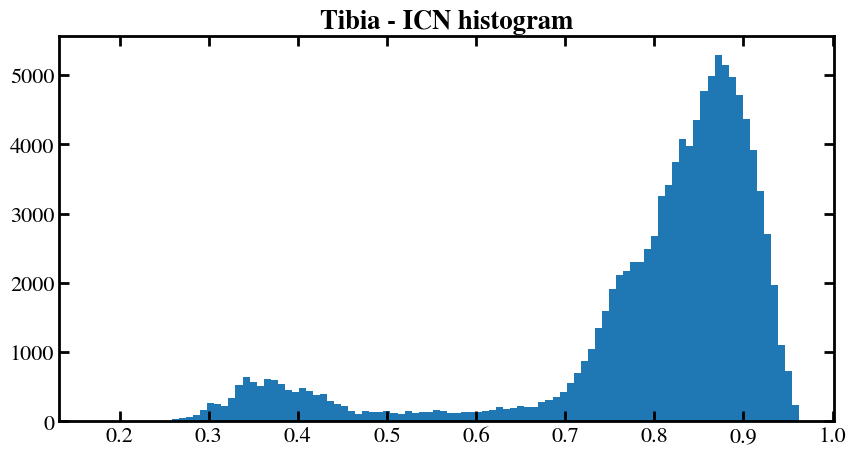

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(np.array(data).flatten(), bins=100, color='tab:blue')
plt.title('Tibia - ICN histogram', weight='bold')
plt.show()